# missingno library to Identify and Visualise Missing Data

In [1]:
import missingno as msno
import pandas as pd

In [2]:
df = pd.read_csv('../input/xeek-train-subset/xeek_train_subset.csv')

## Quick Analysis with Pandas
Before we use the missingno library, there are a few features within the pandas library that can give us an initial insight into how much missing data.

The first is using the `.describe()` method. This returns a table containing summary statistics about the dataframe such as the mean, maximum and minimum values. At the top of the table is a row called counts. In the example below, we can see that we having varying counts for each of the features within the dataframe. This provides an initial indication that not all values are present.

In [3]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,ROP,DTS,DCAL,DRHO,LITHOFACIES
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,91725.000000,100840.000000,132635.000000,93680.000000,130454.000000,12184.000000,56200.000000,105539.000000,133198.000000
mean,1792.944663,451235.640862,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,0.355602,4.511845,122.700286,91.608922,28.163816,176.583712,0.972165,0.009307,63261.582892
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,0.143857,5.092807,34.234879,98.781404,45.592228,44.358622,43.000304,0.067312,13623.352961
min,415.261599,436790.843800,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-0.023143,1.010027,7.415132,-2.199269,0.018832,93.068260,-12.215459,-1.795894,30000.000000
25%,1182.822400,437640.781300,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,0.234927,2.857540,87.899776,48.808243,9.650485,149.754013,0.007800,-0.007736,65000.000000
50%,1747.524496,444152.093800,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,0.382014,3.780121,135.968094,70.282761,22.362363,162.537949,0.415419,0.003215,65000.000000
75%,2413.874901,460442.093800,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,0.480985,5.098502,147.388626,92.173889,35.444058,190.082294,1.118416,0.022928,65030.000000
max,3272.024000,476770.156300,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,0.817310,365.575592,230.432953,526.547302,2224.647461,377.327789,10006.789060,0.433157,99000.000000


We can take this one step further and use the `.info()` method. This will return back a summary of the dataframe as well as a count of the non-null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WELL         133198 non-null  object 
 1   DEPTH_MD     133198 non-null  float64
 2   X_LOC        125805 non-null  float64
 3   Y_LOC        125805 non-null  float64
 4   Z_LOC        125805 non-null  float64
 5   GROUP        133198 non-null  object 
 6   FORMATION    111632 non-null  object 
 7   CALI         133006 non-null  float64
 8   RSHA         62039 non-null   float64
 9   RMED         125556 non-null  float64
 10  RDEP         125805 non-null  float64
 11  RHOB         108053 non-null  float64
 12  GR           133198 non-null  float64
 13  NPHI         91725 non-null   float64
 14  PEF          100840 non-null  float64
 15  DTC          132635 non-null  float64
 16  SP           93680 non-null   float64
 17  ROP          130454 non-null  float64
 18  DTS          12184 non-n

We can see from the example above that we have a more concise summary of the state of the data and the extent of data missingness.

Another quick method we can use is:

In [5]:
df.isna().sum()

WELL                0
DEPTH_MD            0
X_LOC            7393
Y_LOC            7393
Z_LOC            7393
GROUP               0
FORMATION       21566
CALI              192
RSHA            71159
RMED             7642
RDEP             7393
RHOB            25145
GR                  0
NPHI            41473
PEF             32358
DTC               563
SP              39518
ROP              2744
DTS            121014
DCAL            76998
DRHO            27659
LITHOFACIES         0
dtype: int64

This returns a summary of how many missing values are contained within the dataframe. The `isna()` part detects missing values within the dataframe and returns a Boolean value for each element in the dataframe. The `sum()` part sums up the number of True values.
The following information is returned by this line.

From this summary, we can see that a number of columns, namely WELL, DEPTH_MD, GROUP, GR, and LITHOFACIES have no null values. All others have a large and varying degree of missing values.

## Using missingno to Identify Missing Data
Within the missingno library, there are four types of plots for visualising data completeness: the barplot, the matrix plot, the heatmap, and the dendrogram plot. Each has its own advantages for identifying missing data.
  
Let's take a look at each of these in turn.

### Barplot
The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

<AxesSubplot:>

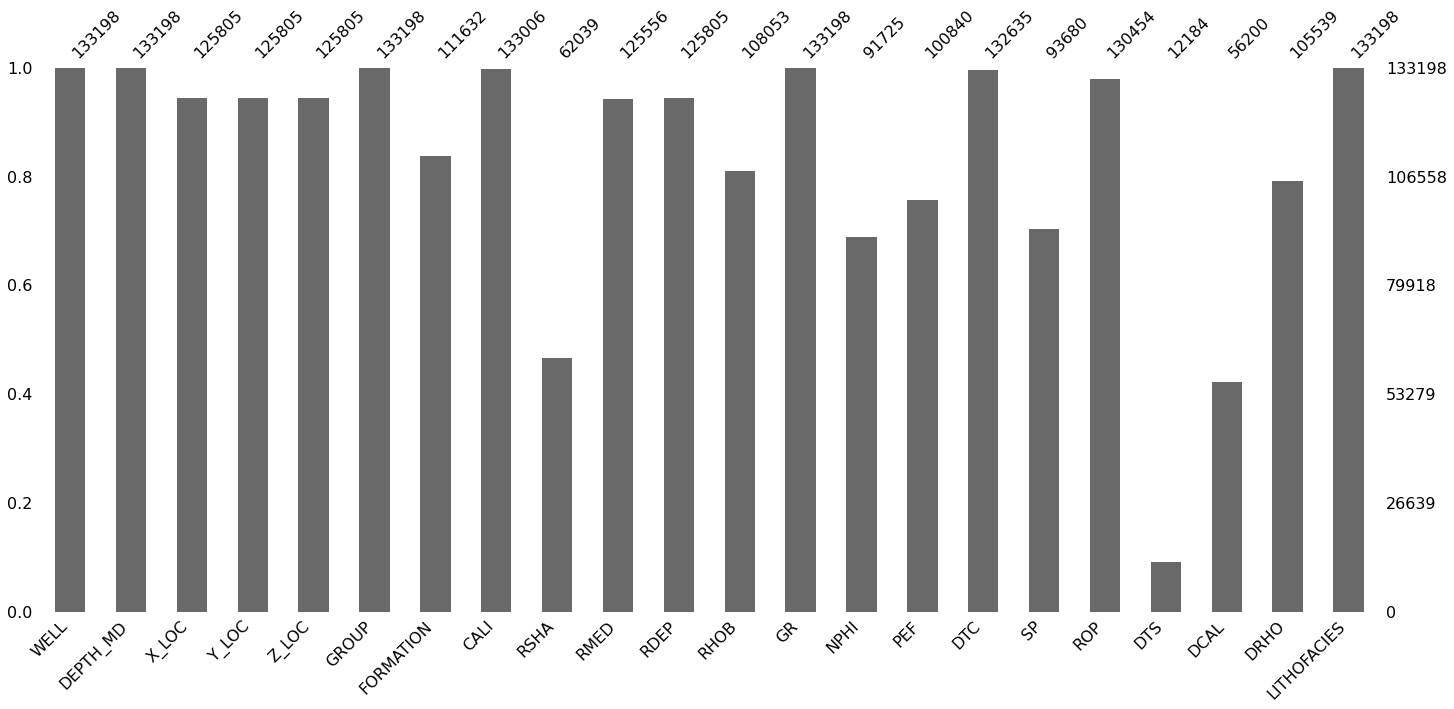

In [6]:
msno.bar(df)

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.
On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.  

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.
In this example we can see that a number of the columns (DTS, DCAL and RSHA) have a large amount of missing values. Other columns (e.g. WELL, DEPTH_MD and GR) are complete and have the maximum number of values.

### Matrix Plot
The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.
The matrix plot can be generated by calling upon:

<AxesSubplot:>

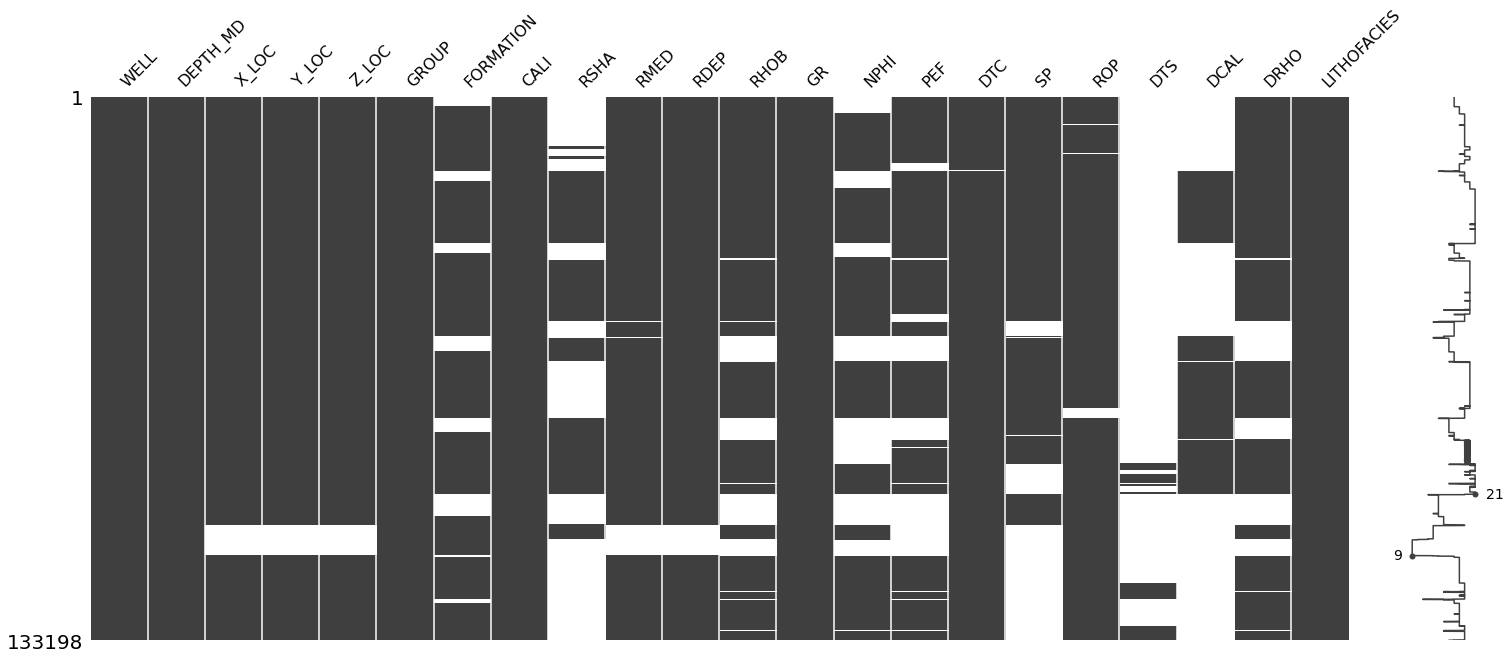

In [7]:
msno.matrix(df)

As seen in the resultant plot, the columns DTS, DCAL, and RSHA show large portions of missing data. This was identified in the bar plot, but the added benefit is you can view how that missing data is distributed in the dataframe.

On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row the line will move towards the left.

### Heatmap
The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.  

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
  
Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
  
Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative. 

The heatmap can be generated by the following code:

<AxesSubplot:>

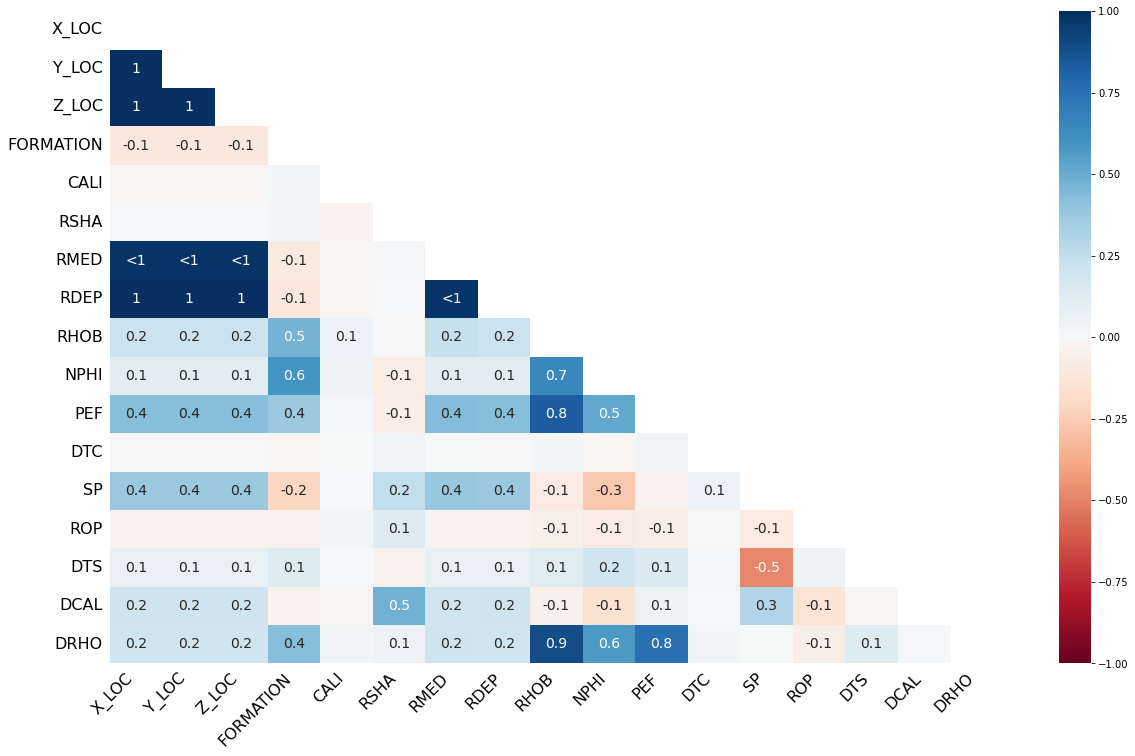

In [8]:
msno.heatmap(df)

Here we can see that the ROP column is slightly negatively correlated with the RHOB, NPHI and PEF columns, and slightly positively correlated with RSHA. If we take a look at DRHO, its absence is highly correlated with missing values in the RHOB, NPHI and PEF columns.
The heatmap approach is more suitable for smaller datasets.

### Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

The dendrogram can be generated by:

<AxesSubplot:>

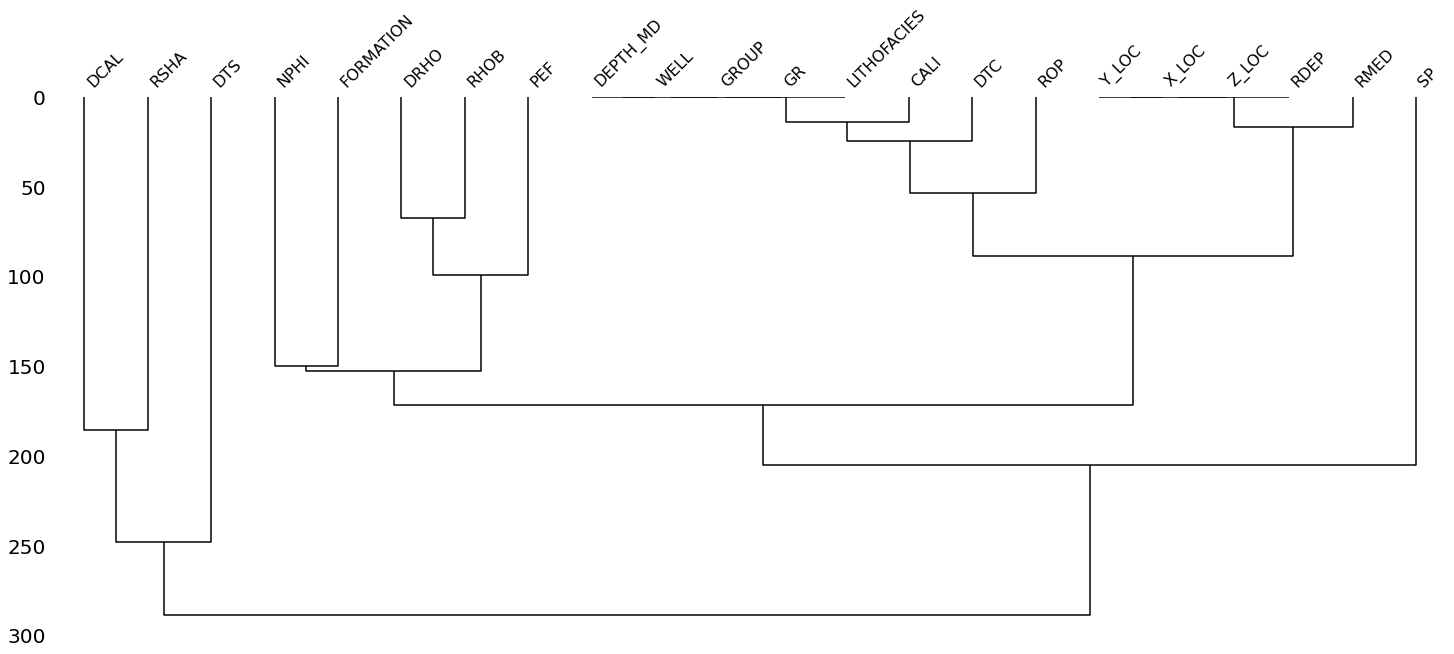

In [9]:
msno.dendrogram(df)

In the dendrogram plot above, we can see we have two distinct groups. The first is on the right side (DTS, RSHA, and DCAL) which all have a high degree of null values. The second is on the left, with the remainder of the columns which are more complete.

LITHOFACIES, GR, GROUP, WELL, and DEPTH_MD are all grouped together at zero indicating that they are complete.

RDEP, Z_LOC, X_LOC, and Y_LOC are grouped together close to zero. RMED is in the same larger branch suggesting that some of the missing values present within that column can be correlated with these four columns.